In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import fbprophet

In [3]:
import quandl
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
upl = quandl.get('BSE/BOM512070')
upl.tail()
#upl.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2020-04-08,332.90,337.45,316.95,320.10,326.19,169813.0,5089.0,55392087.0,25852.0,15.22,20.50,-12.80
2020-04-09,325.05,331.35,312.95,318.90,320.69,184962.0,5621.0,59315899.0,45414.0,24.55,18.40,-6.15
2020-04-13,319.00,334.05,316.65,324.95,326.22,186398.0,5105.0,60805826.0,30622.0,16.43,17.40,5.95
2020-04-15,334.00,381.65,330.00,350.45,363.09,829295.0,21867.0,301105072.0,99168.0,11.96,51.65,16.45
2020-04-16,353.90,368.85,353.90,363.15,364.12,931715.0,10810.0,339253401.0,659407.0,70.77,14.95,9.25


In [4]:
price = upl['Total Turnover']
price.tail()

Date
2020-04-08     55392087.0
2020-04-09     59315899.0
2020-04-13     60805826.0
2020-04-15    301105072.0
2020-04-16    339253401.0
Name: Total Turnover, dtype: float64

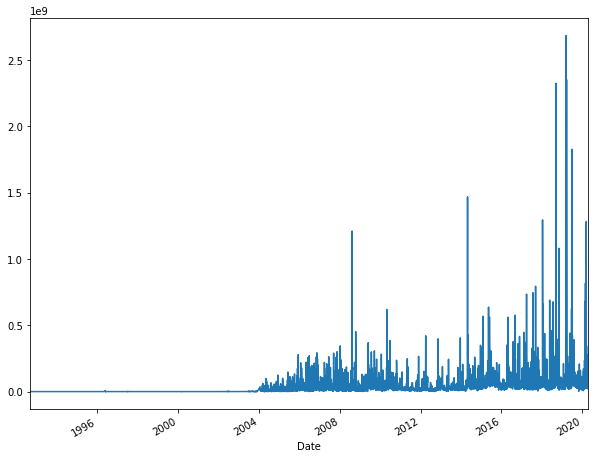

In [5]:
plt.figure(figsize=(10, 8))
price.plot()

In [8]:
#yt = yt -y(t-1)
price = price[1:] - price[1:].shift(1)

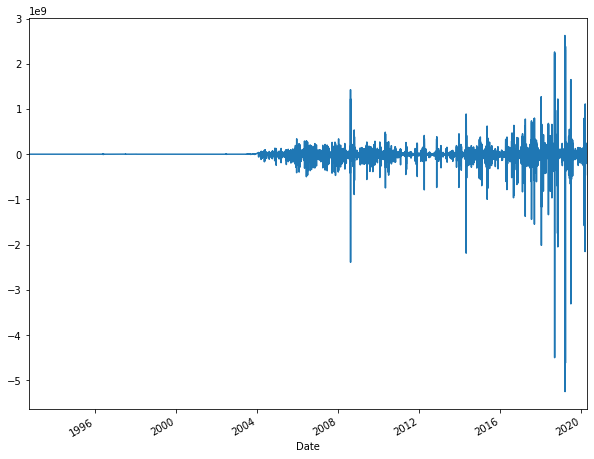

In [9]:
plt.figure(figsize=(10, 8))
price.plot()

In [10]:
from fbprophet import Prophet

In [11]:
# Initialize the Model
model = Prophet()

In [11]:
type(price)

pandas.core.series.Series

In [12]:
price = price.to_frame()

In [13]:
price = price.reset_index()

In [18]:
# Works with a ds and y column names
price.rename(columns={'Date':'ds','Total Turnover':'y'},inplace=True)

C:\Users\RAHUL KHARE\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
price

,ds,y
1,1992-09-22,0.000000e+00
2,1992-09-24,0.000000e+00
3,1992-09-28,0.000000e+00
4,1992-09-29,0.000000e+00
5,1992-09-30,0.000000e+00
6,1992-10-08,0.000000e+00
7,1992-10-12,0.000000e+00
8,1992-10-13,0.000000e+00
9,1994-11-23,0.000000e+00
10,1996-04-24,2.350000e+03


In [20]:
price = price[1:]
price.head()

,ds,y
2,1992-09-24,0.0
3,1992-09-28,0.0
4,1992-09-29,0.0
5,1992-09-30,0.0
6,1992-10-08,0.0


In [21]:
# Fit our Model to our Data
model.fit(price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# Shape of Dataset
price.shape

(5672, 2)

In [23]:
# Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365*2)

In [24]:
# Shape after adding 365 days
future_dates.shape

(6402, 1)

In [25]:
future_dates.tail()

,ds
6397,2022-04-04
6398,2022-04-05
6399,2022-04-06
6400,2022-04-07
6401,2022-04-08


In [26]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

In [27]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6397,2022-04-04,-1.188673e+07,-1.561751e+08,1.480067e+08,-1.188676e+07,-1.188669e+07,3.788518e+06,3.788518e+06,3.788518e+06,7.387019e+06,7.387019e+06,7.387019e+06,-3.598500e+06,-3.598500e+06,-3.598500e+06,0.0,0.0,0.0,-8.098208e+06
6398,2022-04-05,-1.188671e+07,-1.639121e+08,1.451070e+08,-1.188674e+07,-1.188667e+07,5.699250e+06,5.699250e+06,5.699250e+06,8.789359e+06,8.789359e+06,8.789359e+06,-3.090109e+06,-3.090109e+06,-3.090109e+06,0.0,0.0,0.0,-6.187459e+06
6399,2022-04-06,-1.188669e+07,-1.443471e+08,1.555905e+08,-1.188673e+07,-1.188665e+07,1.085583e+07,1.085583e+07,1.085583e+07,1.338229e+07,1.338229e+07,1.338229e+07,-2.526457e+06,-2.526457e+06,-2.526457e+06,0.0,0.0,0.0,-1.030860e+06
6400,2022-04-07,-1.188668e+07,-1.608458e+08,1.434364e+08,-1.188671e+07,-1.188664e+07,1.245169e+07,1.245169e+07,1.245169e+07,1.437083e+07,1.437083e+07,1.437083e+07,-1.919131e+06,-1.919131e+06,-1.919131e+06,0.0,0.0,0.0,5.650178e+05
6401,2022-04-08,-1.188666e+07,-1.556937e+08,1.446959e+08,-1.188669e+07,-1.188662e+07,1.545242e+07,1.545242e+07,1.545242e+07,1.673289e+07,1.673289e+07,1.673289e+07,-1.280468e+06,-1.280468e+06,-1.280468e+06,0.0,0.0,0.0,3.565759e+06


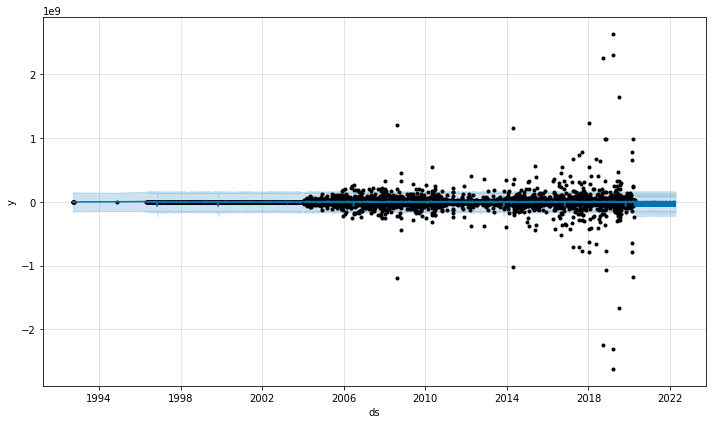

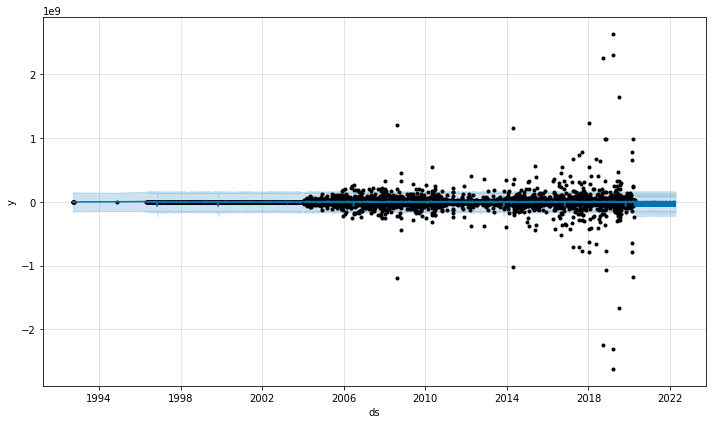

In [28]:
# Plot Our Predictions
model.plot(prediction)

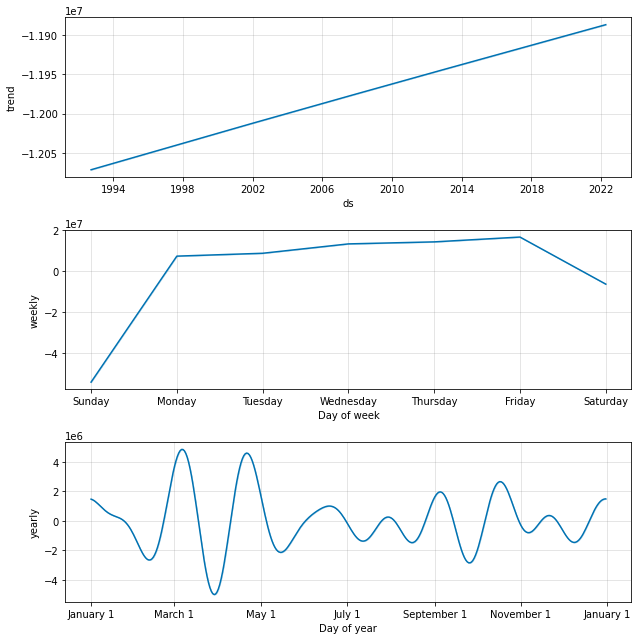

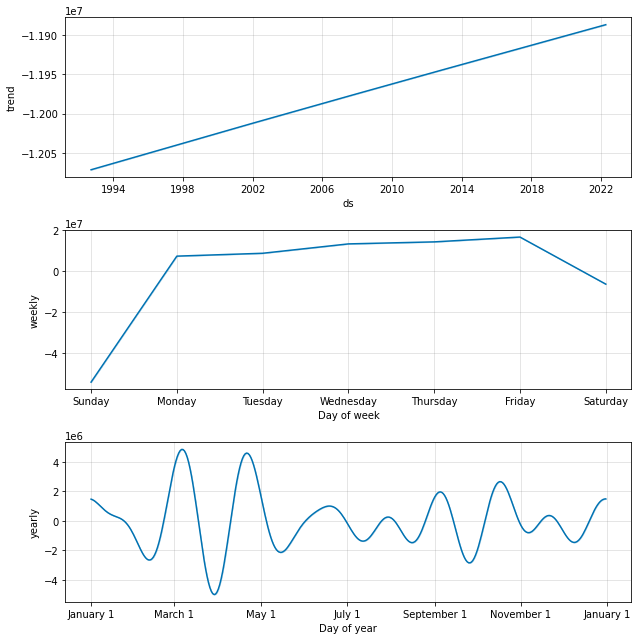

In [29]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

In [30]:
#Cross Validation

from fbprophet.diagnostics import cross_validation

In [31]:
price.shape

(5672, 2)

In [32]:
cv = cross_validation(model,initial='5671 days', period='180 days', horizon = '730 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 2008-05-31 00:00:00 and 2018-04-09 00:00:00


In [33]:
cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-06-02,-4.252984e+05,-4.429122e+07,4.403424e+07,-1.163005e+07,2008-05-31
1,2008-06-03,3.406380e+05,-4.476455e+07,4.351726e+07,-3.305832e+06,2008-05-31
2,2008-06-04,2.242561e+06,-4.276923e+07,4.639805e+07,7.599834e+06,2008-05-31
3,2008-06-05,1.270279e+06,-4.575483e+07,4.646275e+07,4.775309e+07,2008-05-31
4,2008-06-06,-2.038981e+06,-4.430515e+07,4.247172e+07,-4.192656e+07,2008-05-31
5,2008-06-09,-1.800885e+05,-4.289256e+07,4.186887e+07,-1.378853e+07,2008-05-31
6,2008-06-10,4.978499e+05,-4.205828e+07,4.222596e+07,1.106072e+07,2008-05-31
7,2008-06-11,2.312852e+06,-4.103552e+07,5.112078e+07,-1.597295e+07,2008-05-31
8,2008-06-12,1.257110e+06,-4.275134e+07,4.554647e+07,1.807221e+06,2008-05-31
9,2008-06-13,-2.129950e+06,-4.715030e+07,4.613345e+07,2.036481e+06,2008-05-31


In [34]:
#Performance Metrics
from fbprophet.diagnostics import performance_metrics

In [35]:
price_pm = performance_metrics(cv)

In [36]:
price_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,72 days,7.370996e+15,8.585451e+07,3.906770e+07,1.369961,1.003414,0.857692
1,73 days,8.677380e+15,9.315246e+07,3.996785e+07,1.372004,1.003783,0.860096
2,74 days,8.607045e+15,9.277416e+07,3.948912e+07,1.356380,1.003505,0.864080
3,75 days,8.538709e+15,9.240513e+07,3.914466e+07,1.347057,1.003267,0.867115
4,76 days,8.462653e+15,9.199268e+07,3.870798e+07,1.340290,1.003006,0.872115
5,77 days,8.432614e+15,9.182927e+07,3.844251e+07,1.347146,1.003267,0.873269
6,78 days,8.298119e+15,9.109401e+07,3.803702e+07,1.348131,1.003617,0.874936
7,79 days,8.181833e+15,9.045349e+07,3.766716e+07,1.346911,1.003267,0.875666
8,80 days,8.155719e+15,9.030902e+07,3.760641e+07,1.344287,1.002772,0.875755
9,81 days,8.141501e+15,9.023026e+07,3.755991e+07,1.344479,1.003131,0.875000


In [39]:
#Visualizing Performance Metrics

from fbprophet.plot import plot_cross_validation_metric

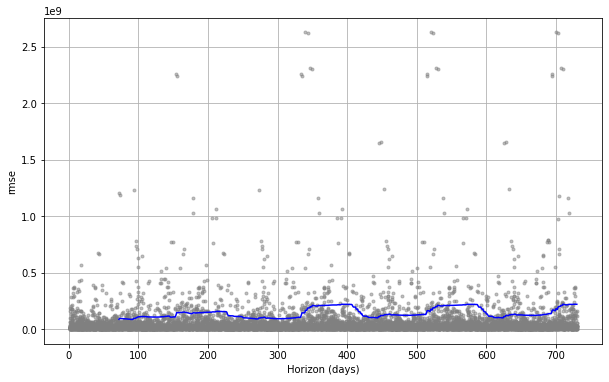

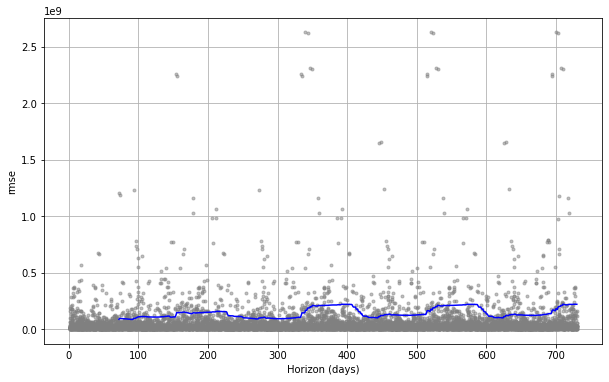

In [40]:
plot_cross_validation_metric(cv,metric='rmse')

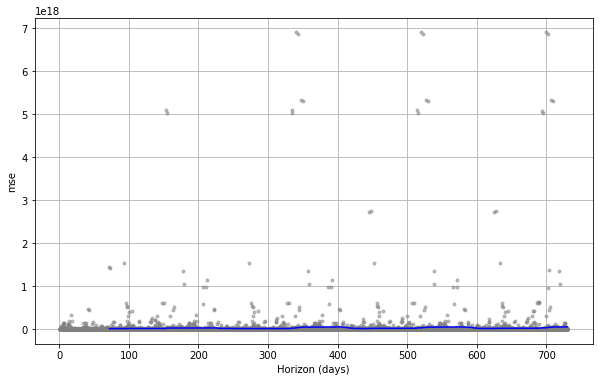

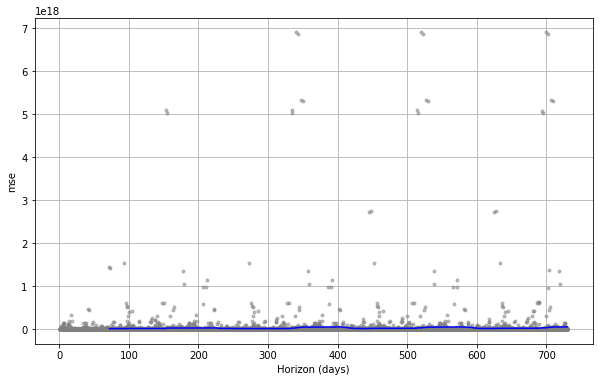

In [42]:
plot_cross_validation_metric(cv,metric='mse')

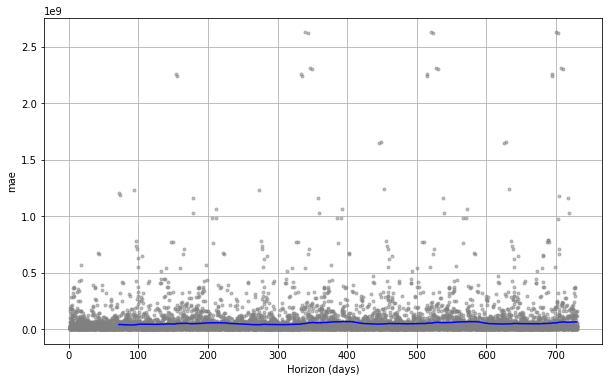

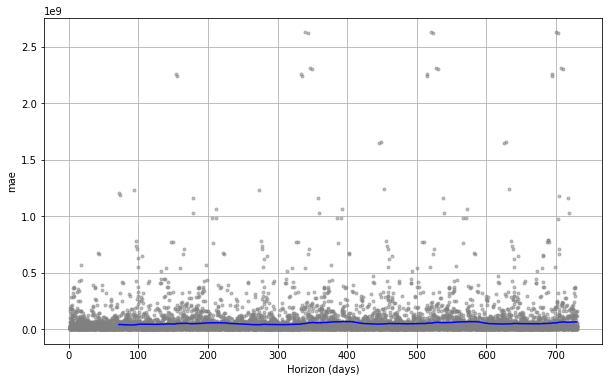

In [44]:
plot_cross_validation_metric(cv,metric='mae')